In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt


# Ejercicio 1

Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:
- Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
- Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
- Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
- Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
- Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
- Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y
rojo.

In [2]:
def img_change(img_name, color):

    img = cv2.imread(img_name, cv2.IMREAD_COLOR)
    ancho = img.shape[0]
    alto = img.shape[1]
    color_change = np.zeros((ancho, alto, 1))
    for i in range(0, ancho):
        for j in range(0, alto):
            pixel = img[i, j]
            if color == 1:      # Apagamos pixel rojo y verde
                pixel[1] = 0
                pixel[2] = 0
            elif color == 2:    # Apagamos pixel azul y rojo
                pixel[0] = 0
                pixel[2] = 0
            elif color == 3:    # Apagamos pixel azul y verde
                pixel[0] = 0
                pixel[1] = 0
            elif color == 10:   # Apagamos pixel azul
                pixel[0] = 0
            elif color == 20:   # Apagamos pixel rojo
                pixel[2] = 0
            elif color == 30:   # Apagamos pixel verde
                pixel[1] = 0
            color_change[i, j] = int(pixel[0] + pixel[1] + pixel[2])
    cv2.imwrite('Imagen.jpg', img)

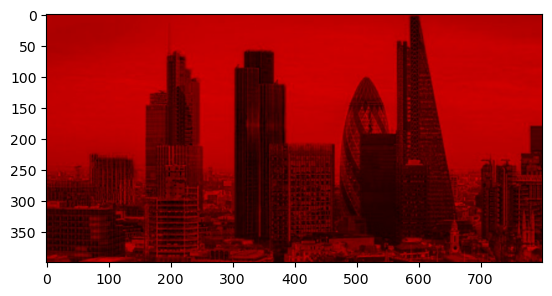

In [3]:
imagen_name = 'edificios.jpg'

color = int(input("Ingrese opcion: "))
img_change(imagen_name, color)
imgTemp = cv2.imread('Imagen.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(imgTemp, cmap='gray')
plt.show()


# Ejercicio 2

En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes
fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se
construya la imagen original a color.

In [4]:
def create_image_gray(imagen_red, imagen_green, imagen_blue):
    grey_red = cv2.imread(imagen_red, cv2.IMREAD_GRAYSCALE)
    grey_blue = cv2.imread(imagen_blue, cv2.IMREAD_GRAYSCALE)
    grey_green = cv2.imread(imagen_green, cv2.IMREAD_GRAYSCALE)
    ancho = grey_red.shape[0]
    alto = grey_red.shape[1]
    color_array = np.zeros((ancho, alto, 3))
    for i in range(0, ancho):
        for j in range(0, alto):
            pixel_blue = grey_blue[i, j]
            pixel_red = grey_red[i, j]
            pixel_green = grey_green[i, j]
            color_array[i, j] = [pixel_blue, pixel_green, pixel_red]

    cv2.imwrite('color_image.jpg', color_array)
    color_image = cv2.imread('color_image.jpg', cv2.IMREAD_COLOR)
    plt.imshow(color_image, cmap='gray')
    plt.show()

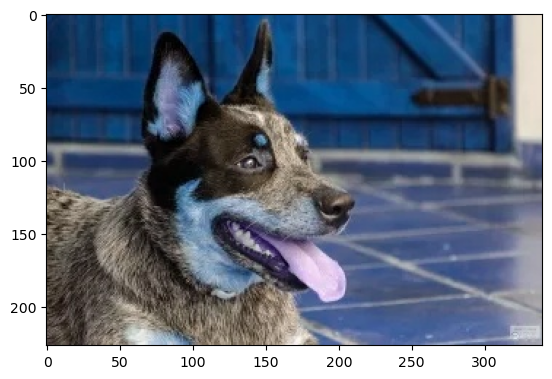

In [5]:
imagen1 = "imagen3\perro_salida_gray_azul.jpg"
imagen2 = "imagen3\perro_salida_gray_rojo.jpg"
imagen3 = "imagen3\perro_salida_gray_verde.jpg"

create_image_gray(imagen2, imagen3, imagen1)

# Ejercicio 3

Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [10]:
def create_grey_division(imagen):
    img = cv2.imread(imagen, cv2.IMREAD_COLOR)
    ancho = img.shape[0]
    alto = img.shape[1]
    blue_array_gray = np.zeros((ancho, alto, 1))
    green_array_gray = np.zeros((ancho, alto, 1))
    red_array_gray = np.zeros((ancho, alto, 1))
    for i in range(0, ancho):
        for j in range(0, alto):
            pixel = img[i, j]
            blue_array_gray[i, j] = int(pixel[0])
            green_array_gray[i, j] = int(pixel[1])
            red_array_gray[i, j] = int(pixel[2])

    cv2.imwrite('out_blue_gray.jpg', blue_array_gray)
    color_gray_blue = cv2.imread('out_blue_gray.jpg', cv2.IMREAD_GRAYSCALE)
    plt.imshow(color_gray_blue, cmap='gray')
    plt.show()

    cv2.imwrite('out_green_gray.jpg', green_array_gray)
    color_gray_green = cv2.imread('out_green_gray.jpg', cv2.IMREAD_GRAYSCALE)
    plt.imshow(color_gray_green, cmap='gray')
    plt.show()

    cv2.imwrite('out_red_gray.jpg', red_array_gray)
    color_gray_red = cv2.imread('out_red_gray.jpg', cv2.IMREAD_GRAYSCALE)
    plt.imshow(color_gray_red, cmap='gray')
    plt.show()
    

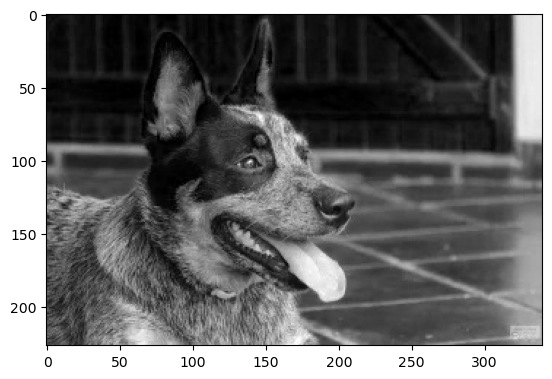

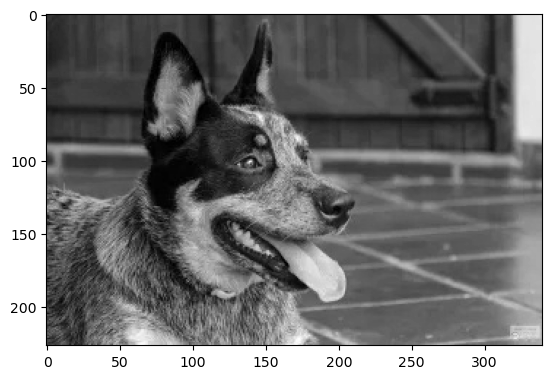

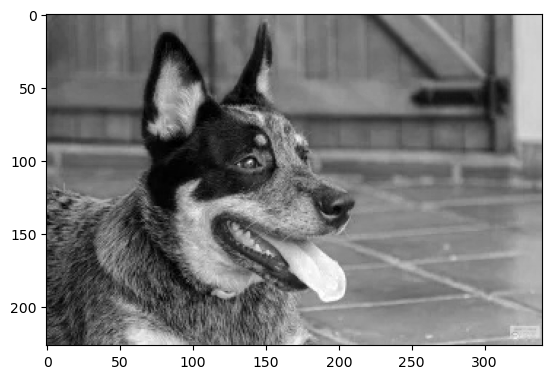

In [11]:
imagen = 'color_image.jpg'
create_grey_division(imagen)

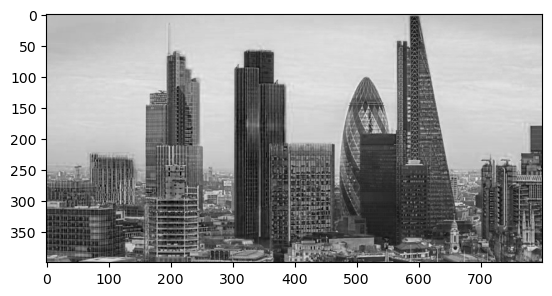

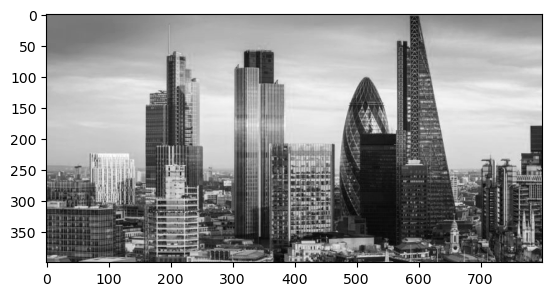

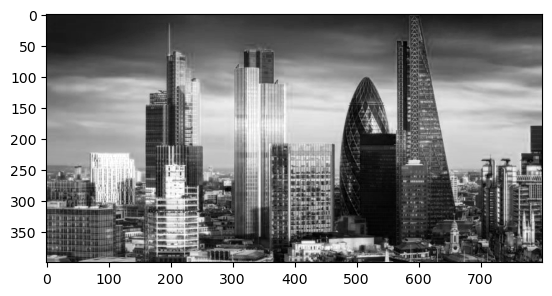

In [12]:
imagen = 'edificios.jpg'
create_grey_division(imagen)

# Ejercicio 4 

Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media
de la distribucion.

In [13]:
def value_line(densidad, intensidad, media):
    # function to find nearest value to n_value
    x_value = 0
    index = np.argmin(np.abs(np.array(densidad) - media))
    near_value = densidad[index]
    lista_tupla = list(zip(intensidad, densidad))
    for x in lista_tupla:
        if x[1] == near_value:
            x_value = x[0]
    return x_value


def histogram_f(imagen):
    img = cv2.imread(imagen)
    img = cv2.cvtColor(img, cv2.IMREAD_COLOR)

    ancho = img.shape[0]
    alto = img.shape[1]

    intensidad = range(0, 256)  # arreglo de intensidades
    frecuencias = np.zeros(256)  # arreglo de frecuencias
    frecuencias_green = np.zeros(256)  # arreglo de frecuencias
    frecuencias_red = np.zeros(256)  # arreglo de frecuencias

    for i in range(0, ancho):
        for j in range(0, alto):
            pixel = img[i, j]
            frecuencias[pixel[0]] = frecuencias[pixel[0]] + 1
            frecuencias_green[pixel[1]] = frecuencias_green[pixel[1]]+1
            frecuencias_red[pixel[2]] = frecuencias_red[pixel[2]] + 1

    densidad = np.true_divide(frecuencias, (ancho * alto))
    densidad_green= np.true_divide(frecuencias_green, (ancho * alto))
    densidad_red = np.true_divide(frecuencias_red, (ancho * alto))
    media = np.mean(densidad)
    media_green = np.mean(densidad_green)
    media_red = np.mean(densidad_red)

    plt.subplot(311)
    plt.axvline(value_line(densidad, intensidad, media), color='k')
    plt.plot(intensidad, densidad)
    plt.ylabel("Densidad")
    plt.xlabel("Intensidad")
    plt.title("Histograma Color Azul")
    plt.grid()
    plt.subplot(312)
    plt.axvline(value_line(densidad_green, intensidad, media_green), color='k')
    plt.plot(intensidad, densidad_green)
    plt.ylabel("Densidad")
    plt.xlabel("Intensidad")
    plt.title("Histograma Color Verde")
    plt.grid()
    plt.subplot(313)
    plt.axvline(value_line(densidad_red, intensidad, media_red), color='k')
    plt.plot(intensidad, densidad_red)
    plt.ylabel("Densidad")
    plt.xlabel("Intensidad")
    plt.title("Histograma Color Rojo")
    plt.grid()
    plt.subplots_adjust(hspace=1)
    plt.show()

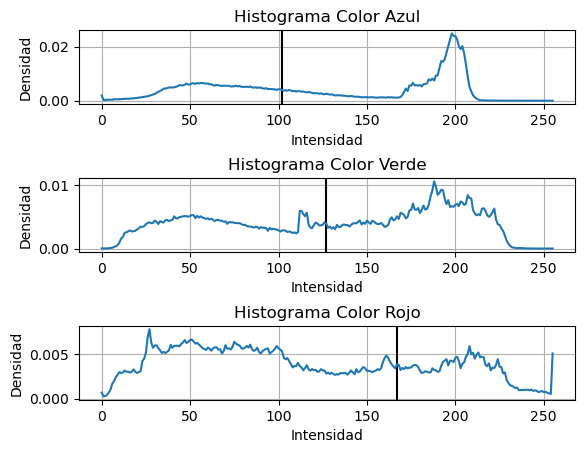

In [14]:
img_file_str = 'edificios.jpg'
histogram_f(img_file_str)